# Project: Global Life Expectancy Prediction with Machine Learning

### Group member: Weitian Zhu, Hieu Chu, Wenlan Lu

### **Data and Model Documentation**
#### **Data Overview**

- **Data Source:** https://www.kaggle.com/datasets/kiranshahi/life-expectancy-dataset
- **Number of Variables (Columns):** `22`
- **Number of Observations (Rows):** `9928`
- **Missing Cells (NA Values):** `0`
- **Percentage of Missing Cells:** `0.0%`

#### **Feature Details for Modeling:**

We selected 16 key features based on demographic, health, and economic indicators for our model. Each feature's data type is noted, highlighting the robustness and completeness of our dataset. 

**Selected columns and Data Types that we will use:**

| No  | Feature Variables                       | Non-Null Count | Dtype   |
|-----|-----------------------------------------|----------------|---------|
| 0   | Gender                                  | 9928 non-null  | object  |
| 1   | Life expectancy                         | 9928 non-null  | float64 |
| 2   | Unemployment                            | 9928 non-null  | float64 |
| 3   | Infant Mortality                        | 9928 non-null  | float64 |
| 4   | Clean fuels and cooking technologies    | 9928 non-null  | float64 |
| 5   | Per Capita                              | 9928 non-null  | float64 |
| 6  | Mortality caused by road traffic injury | 9928 non-null  | float64 |
| 7  | Tuberculosis Incidence                  | 9928 non-null  | float64 |
| 8  | DPT Immunization                        | 9928 non-null  | float64 |
| 9  | HepB3 Immunization                      | 9928 non-null  | float64 |
| 10  | Measles Immunization                    | 9928 non-null  | float64 |
| 11  | Hospital beds                           | 9928 non-null  | float64 |
| 12  | Basic sanitation services               | 9928 non-null  | float64 |
| 13  | Tuberculosis treatment                  | 9928 non-null  | float64 |
| 14  | Non-communicable Mortality              | 9928 non-null  | float64 |
| 15 | Sucide Rate                             | 9928 non-null  | float64 |

### **Model Specification**

#### **Targets for Modeling:** Life Global Expectancy
Our objective is to employ supervised learning techniques to predict global life expectancy. We aim to use diverse modeling strategies to ensure reliability and accuracy.

**Models Employed**
- Linear Models: Simple Linear, Ridge, Lasso, Elastic Net
- Tree-Based Models: Decision Tree, Random Forest, Gradient Boosting
- Neural Network: Multilayer Perceptron (MLP)

**Goals and objectives:**

1. Analyze life expectancy variations and correlations with health indicators across nations.
2. Investigate relationships between life expectancy and factors like infant mortality and vaccination rates.
3. Assess impacts of environmental and economic factors on health outcomes.
4. Identify key determinants of health longevity.
5. Develop predictive models for life expectancy using historical and current data.


## **Part 1： Data Exploration** ##
This part involves exploring the dataset to understand the distribution and statistics of the data.

In [1]:
# All the import codes should be put inside this block

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import math
import os
import keras
from urllib.request import urlretrieve
from scipy.stats import norm, ttest_ind, randint, uniform, stats
from scipy.special import expit
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from ydata_profiling import ProfileReport
os.environ["KERAS_BACKEND"] = "torch"



In [2]:
# Import data into python
path = 'Life Expectancy Data.csv'
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9928 entries, 0 to 9927
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  9928 non-null   object 
 1   Year                                     9928 non-null   int64  
 2   Gender                                   9928 non-null   object 
 3   Life expectancy                          9928 non-null   float64
 4   Unemployment                             9928 non-null   float64
 5   Infant Mortality                         9928 non-null   float64
 6   GDP                                      9928 non-null   float64
 7   GNI                                      9928 non-null   float64
 8   Clean fuels and cooking technologies     9928 non-null   float64
 9   Per Capita                               9928 non-null   float64
 10  Mortality caused by road traffic injury  9928 no

,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
0,Afghanistan,2000,Female,57.120,13.846,85.0,1.368449e+10,1.824044e+10,6.4,434.739537,...,24.0,65.076923,27.0,0.30,21.870802,85.0,22.078,77.922,39.4,4.8
1,Afghanistan,2001,Female,57.596,13.849,82.7,1.368449e+10,1.824044e+10,7.2,434.739537,...,33.0,65.076923,37.0,0.39,21.881304,84.0,22.169,77.831,40.1,4.8
2,Afghanistan,2002,Female,58.080,14.355,80.4,4.055180e+09,1.824044e+10,8.2,179.426579,...,36.0,65.076923,35.0,0.39,23.274193,87.0,22.261,77.739,40.5,4.6
3,Afghanistan,2003,Female,58.578,14.222,77.8,4.515559e+09,1.824044e+10,9.4,190.683814,...,41.0,65.076923,39.0,0.39,24.667435,86.0,22.353,77.647,40.1,4.6
4,Afghanistan,2004,Female,59.093,14.047,75.3,5.226779e+09,1.824044e+10,10.4,211.382074,...,50.0,65.076923,48.0,0.39,26.067695,89.0,22.500,77.500,40.2,4.6


1. To find disparities in life expectancy and health outcomes across different countries and how they correlate with various health factors.

In [3]:
# Calculate descriptive statistics for the dataset and visualize the distribution using a color gradient.
display(df.describe().style.background_gradient(cmap='Blues'))

,Year,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,Tuberculosis Incidence,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
count,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000
mean,2009.495367,69.833645,8.256285,30.234766,2032870320199.633057,2042053577025.780029,60.593023,12668.853095,18.229214,136.043211,85.685266,81.307785,84.854727,2.986346,71.105951,76.725636,55.558734,44.441266,22.099540,10.619222
std,5.761572,9.301549,6.155461,25.460810,7249369673698.859375,7254721460142.498047,36.963992,19447.597833,8.222567,176.090014,14.208445,18.468902,14.218056,2.284127,29.583123,14.756537,22.435801,22.435801,8.504364,11.070262
min,2000.000000,38.861000,0.052000,1.400000,63101272.369918,72802185.001301,0.000000,111.927225,0.000000,0.000000,19.000000,0.049754,16.000000,0.010000,2.755094,0.000000,8.246000,0.000000,4.400000,0.000000
25%,2005.000000,63.894250,4.331000,9.300000,7267552276.128665,7584112233.045862,23.000000,1366.059425,12.700000,21.000000,81.000000,75.082677,79.000000,1.308194,46.007247,73.000000,36.518500,26.118280,16.300000,4.000000
50%,2009.000000,71.445000,6.561500,23.300000,45247974037.038254,45940355554.258400,61.950001,4348.605304,18.229214,82.000000,90.103762,86.700000,89.320315,2.632000,84.227286,78.000000,55.367000,44.633000,21.924913,7.800000
75%,2014.000000,76.845250,10.132750,44.865050,501278724553.924500,523061711019.377014,99.333589,14443.944185,24.100000,159.000000,96.000000,95.000000,95.092289,3.600000,97.177042,86.000000,73.881720,63.481500,26.200000,12.300000
max,2019.000000,88.100000,43.166000,146.200000,87568054407493.093750,87532722519257.593750,100.000000,180366.715198,64.600000,1590.000000,99.000000,99.000000,99.000000,14.690000,100.000004,100.000000,100.000000,91.754000,64.100000,147.800000


In [4]:
# Group the data by 'Country' and 'Gender' and calculate the mean life expectancy.
# This produces a DataFrame with the average life expectancy by gender for each country.

country_life_expectancy = df.groupby(['Country', 'Gender'])['Life expectancy'].mean().reset_index()
display(country_life_expectancy)

,Country,Gender,Life expectancy
0,Afghanistan,Female,61.995000
1,Afghanistan,Male,59.256400
2,Africa Eastern and Southern,Female,59.767036
3,Africa Eastern and Southern,Male,55.854538
4,Africa Western and Central,Female,54.721033
...,...,...,...
507,"Yemen, Rep.",Male,62.948550
508,Zambia,Female,56.863200
509,Zambia,Male,52.171550
510,Zimbabwe,Female,52.786750


In [5]:

# Calculate the average life expectancy by country and gender
average_life_expectancy = df.groupby(['Country', 'Gender'])['Life expectancy'].mean().reset_index()

# Separate the data into male and female subsets
avg_male_life_expectancy = average_life_expectancy[average_life_expectancy['Gender'] == 'Male']
avg_female_life_expectancy = average_life_expectancy[average_life_expectancy['Gender'] == 'Female']

# Identify the top and bottom 5 countries based on life expectancy for males and females.
top_male_countries = avg_male_life_expectancy.sort_values(by='Life expectancy', ascending=False).head(5)
bottom_male_countries = avg_male_life_expectancy.sort_values(by='Life expectancy', ascending=True).head(5)

top_female_countries = avg_female_life_expectancy.sort_values(by='Life expectancy', ascending=False).head(5)
bottom_female_countries = avg_female_life_expectancy.sort_values(by='Life expectancy', ascending=True).head(5)

# Display the results
print("Top 5 countries with the highest average life expectancies for males:")
print(top_male_countries)
print("\nTop 5 countries with the highest average life expectancies for females:")
print(top_female_countries)

print("\nTop 5 countries with the lowest average life expectancies for males:")
print(bottom_male_countries)
print("\nTop 5 countries with the lowest average life expectancies for females:")
print(bottom_female_countries)


Top 5 countries with the highest average life expectancies for males:
                  Country Gender  Life expectancy
395            San Marino   Male           84.100
199  Hong Kong SAR, China   Male           80.085
213               Iceland   Male           80.025
455           Switzerland   Male           79.815
75         Cayman Islands   Male           79.800

Top 5 countries with the highest average life expectancies for females:
                  Country  Gender  Life expectancy
394            San Marino  Female         86.80000
232                 Japan  Female         86.18050
198  Hong Kong SAR, China  Female         85.99000
286      Macao SAR, China  Female         85.29755
160                France  Female         84.75500

Top 5 countries with the lowest average life expectancies for males:
                      Country Gender  Life expectancy
269                   Lesotho   Male         44.47915
77   Central African Republic   Male         46.08955
139                

In [6]:
# Separate the life expectancy data for males and females
male_life_expectancy = df[df['Gender'] == 'Male']['Life expectancy']
female_life_expectancy = df[df['Gender'] == 'Female']['Life expectancy']

# Run the independent samples t-test
t_stat, p_value = ttest_ind(male_life_expectancy, female_life_expectancy)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in life expectancy between males and females.")
else:
    print("There is no significant difference in life expectancy between males and females.")



T-statistic: -26.628683822478326
P-value: 5.832876767294278e-151
There is a significant difference in life expectancy between males and females.


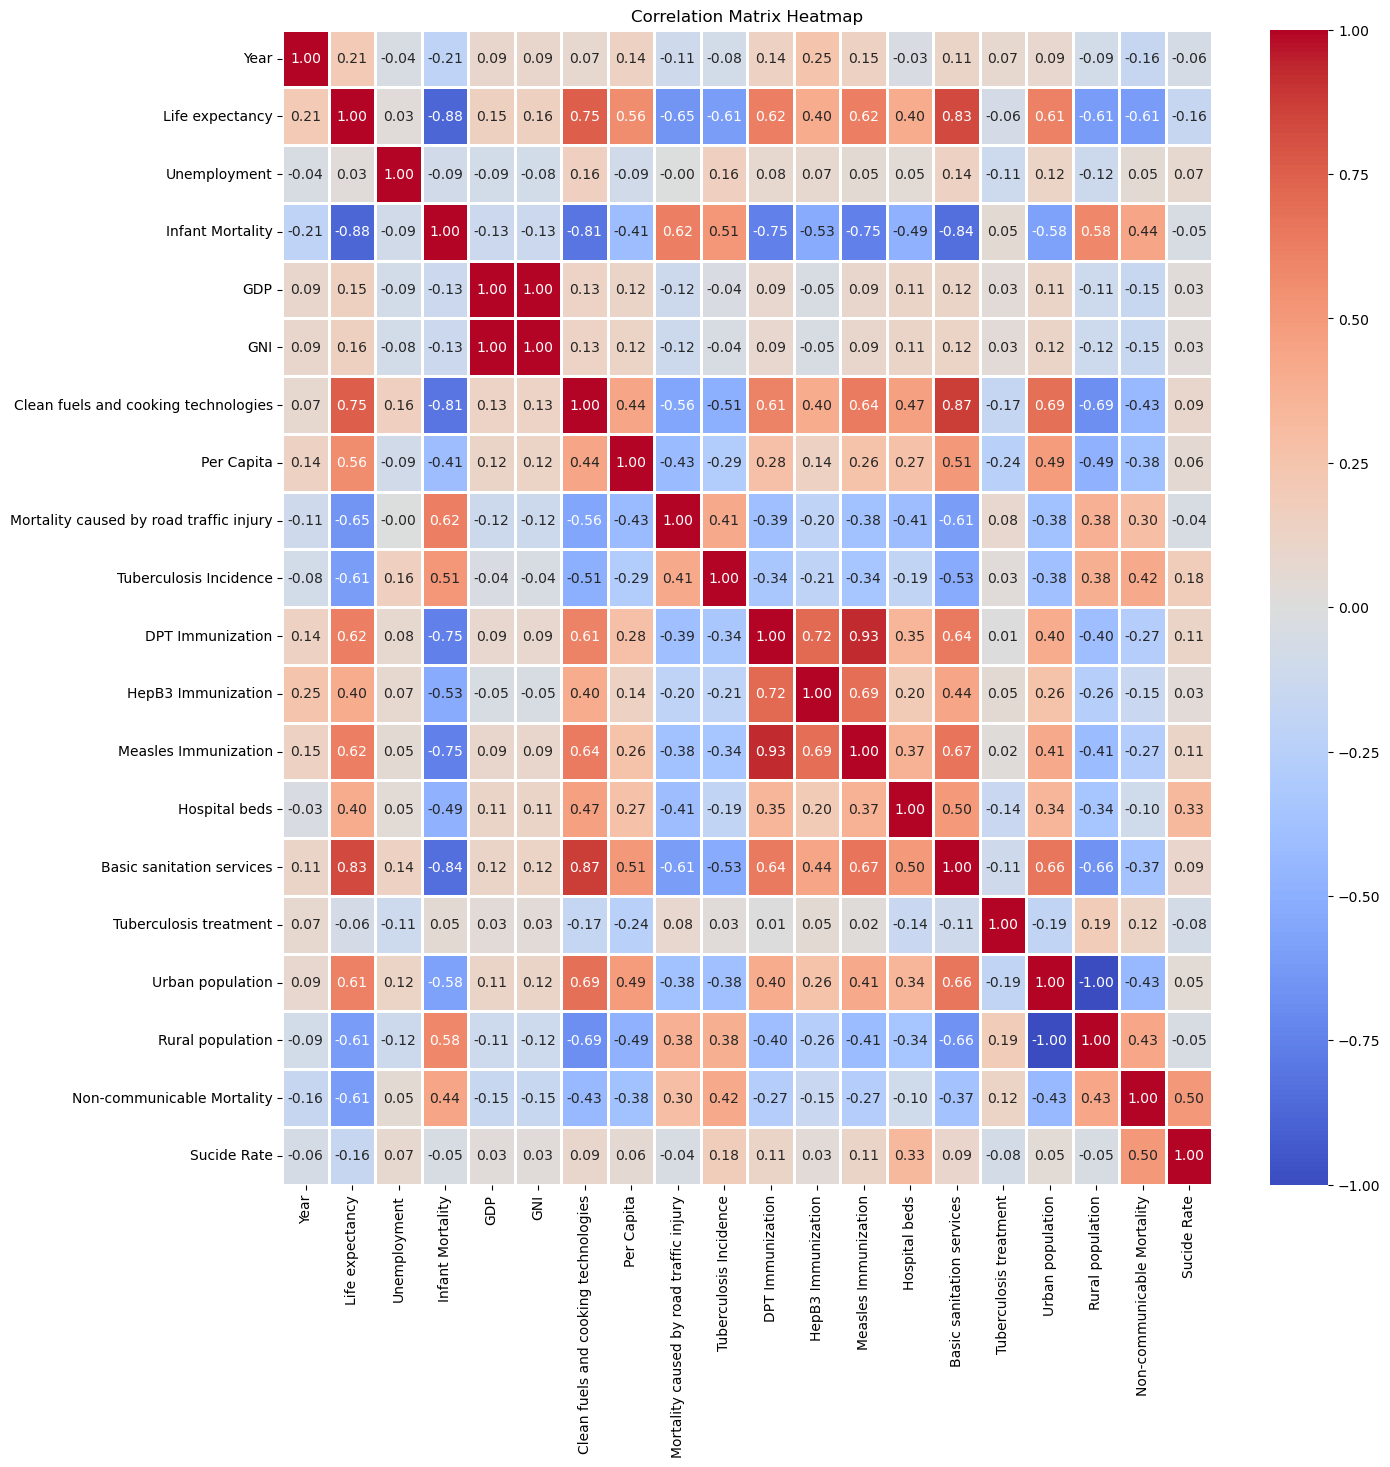

In [7]:
# Exclude non-numeric columns and calculate the correlation matrix among numerical variables
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths= 1)
plt.title('Correlation Matrix Heatmap')
plt.show()


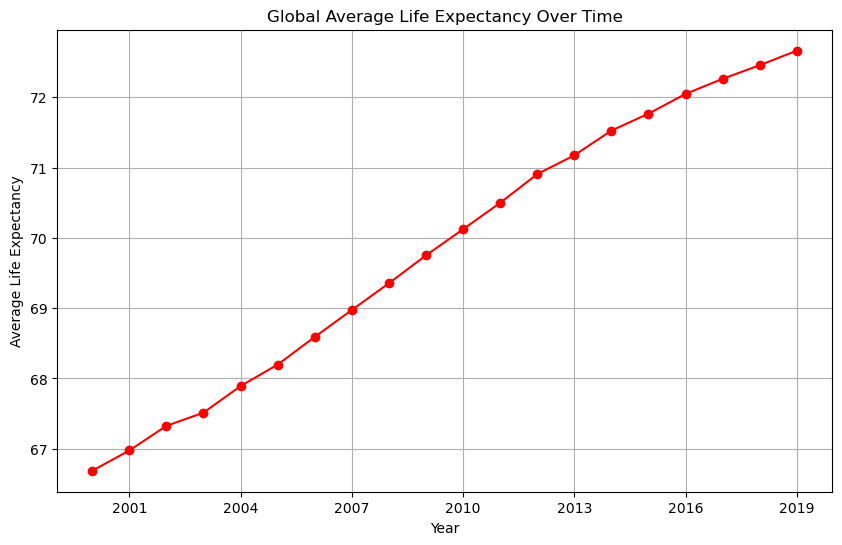

In [8]:
# Calculate and plot the global average life expectancy over time
average_life_expectancy_by_year = df.groupby('Year')['Life expectancy'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(average_life_expectancy_by_year['Year'], average_life_expectancy_by_year['Life expectancy'], 
        marker='o', linestyle='-', color='red')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('Global Average Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.grid(True)
plt.show()


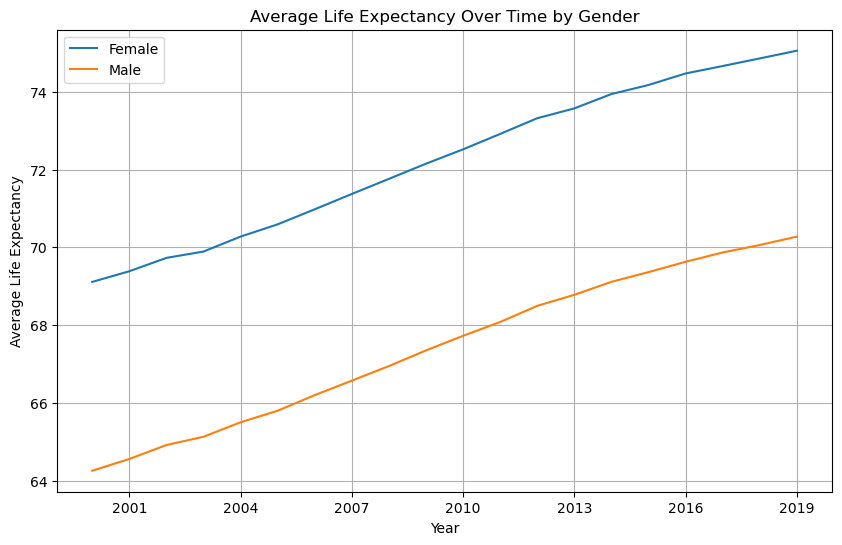

In [9]:
# Create a pivot table for life expectancy by year and gender
pivot_df = df.pivot_table(values='Life expectancy', index='Year', columns='Gender', aggfunc='mean')

# Plot the data
plt.figure(figsize=(10, 6))
ax = plt.gca()
for gender in pivot_df.columns:
    ax.plot(pivot_df.index, pivot_df[gender], label=gender)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('Average Life Expectancy Over Time by Gender')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()


Conclusion:
    
1. The average life expectancies on the same country has difference, the females have about 4 or 5 years more of average life expectancies than males'. Moreover, the average life expectancies in developed countries is 40%-50% higher than it in poor countries.

2. The heatmap of the correlation matrix aids in understanding the complex interplay between various socioeconomic and health indicators and life expectancy. Factors such as GDP, infant mortality, and access to clean fuels and technologies exhibit strong correlations with life expectancy.

2. Furthermore, the data indicates an overall upward trajectory in life expectancy for both genders, reflecting advancements in healthcare, improved living standards, and global health initiatives.

3. Global life expectancy data analysis revealed significant and consistent trends that align with well-established demographic patterns. Notably, there is a discernible disparity between genders, with women exhibiting a higher life expectancy than men across all observed years. 

## **Part 2：Data Preprocessing** ##

This section delineates the data preprocessing workflow essential for optimizing the dataset ahead of the modeling phase. The process ensures that the data format and quality are consistent with the requirements of the predictive models to be applied subsequently.

To streamline the feature set for our predictive models, we eliminate columns that are unlikely to influence the target variable based on preliminary analysis:
- 'Country' and 'Year' are excluded due to their nominal nature, which does not directly impact life expectancy.
- Economic indicators such as 'GDP', 'GNI', and demographic factors like 'Urban population', 'Rural population' are highly correlated with 'Per Capita' values. To prevent multicollinearity, only 'Per Capita' will be retained.

In [10]:
# Dropping columns that are not relevant to the predictive model.
df_dropped = df.drop(['Country', 'Year', 'GDP', 'GNI', 'Urban population', 'Rural population'], axis=1)

# Ensuring that there are no missing values that could adversely affect the model.
df_new = df_dropped.dropna()

# Encoding the 'Gender' categorical variable to a format suitable for modeling.
df_new = pd.get_dummies(df_new, columns=['Gender'])

# Standardization makes the optimization process during modeling more efficient.
df_new.iloc[:, 1:15] = StandardScaler().fit_transform(df_new.iloc[:, 1:15])

df_new.info()
df_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9928 entries, 0 to 9927
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Life expectancy                          9928 non-null   float64
 1   Unemployment                             9928 non-null   float64
 2   Infant Mortality                         9928 non-null   float64
 3   Clean fuels and cooking technologies     9928 non-null   float64
 4   Per Capita                               9928 non-null   float64
 5   Mortality caused by road traffic injury  9928 non-null   float64
 6   Tuberculosis Incidence                   9928 non-null   float64
 7   DPT Immunization                         9928 non-null   float64
 8   HepB3 Immunization                       9928 non-null   float64
 9   Measles Immunization                     9928 non-null   float64
 10  Hospital beds                            9928 no

,Life expectancy,Unemployment,Infant Mortality,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,Tuberculosis Incidence,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Non-communicable Mortality,Sucide Rate,Gender_Female,Gender_Male
0,57.120,0.908136,2.151070,-1.466177,-0.629113,-0.429232,0.306431,-4.341670,-0.878865,-4.069307,-1.176152,-1.664382,0.560754,2.034406,-0.525689,1,0
1,57.596,0.908624,2.060731,-1.444533,-0.629113,-0.380583,0.300752,-3.708212,-0.878865,-3.365941,-1.136748,-1.664027,0.492984,2.116721,-0.525689,1,0
2,58.080,0.990831,1.970391,-1.417478,-0.642242,-0.404908,0.300752,-3.497059,-0.878865,-3.506614,-1.136748,-1.616941,0.696294,2.163758,-0.543756,1,0
3,58.578,0.969223,1.868268,-1.385013,-0.641663,-0.392746,0.300752,-3.145138,-0.878865,-3.225268,-1.136748,-1.569843,0.628524,2.116721,-0.543756,1,0
4,59.093,0.940792,1.770073,-1.357958,-0.640598,-0.368421,0.300752,-2.511680,-0.878865,-2.592238,-1.136748,-1.522507,0.831834,2.128480,-0.543756,1,0


## **Part 3：Simple Linear Regression: Find Significant Variables** ##

#### **Model: Simple Linear Regression using OLS summary()** ####

In [11]:
# Identify the initial X and y
X = df_new.drop(['Life expectancy'], axis=1)
y = df_new['Life expectancy']

# Add a constant to the model (the intercept term)
X = sm.add_constant(X)

# Fit the regression model using Ordinary Least Squares
model = sm.OLS(y, X).fit()

# Display the summary statistics of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     6876.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:34:21   Log-Likelihood:                -24145.
No. Observations:                9928   AIC:                         4.832e+04
Df Residuals:                    9912   BIC:                         4.844e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

**From the summary result above:**

**Non-Significant Variables:** The p-values for DPT Immunization, Gender_Female, and Gender_Male are greater than 0.05, indicating that these variables do not significantly impact life expectancy in the presence of other variables.**


**Conclusion:**

- **Positive Impact:** Variables with positive coefficients and p-values less than 0.05, such as Per Capita, positively correlate with life expectancy. This suggests that increases in per capita income are associated with increases in life expectancy.

- **Negative Impact:** Some variables have negative coefficients and p-values less than 0.05, indicating a negative relationship with life expectancy. For instance, higher Infant Mortality and Non-communicable Mortality rates are linked to decreased life expectancy.

- **Insignificant Variables:** Certain factors, including DPT Immunization, and the gender indicators, do not show a significant relationship with life expectancy, likely due to the effects of other variables in the analysis.

- **Consideration of Multicollinearity:** A note on multicollinearity warns us that some variables may be too closely related, potentially skewing their individual impacts. To address this, one should examine the correlation between variables and consider adjustments such as removing or combining correlated predictors.

- **Model Assumptions:** This model is based on the assumption that the relationship between the predictors and life expectancy is linear.

In [12]:
# Use the the model to make predictions based on the independent variables in x.
y_pred = model.predict(X) 

# Calculate MSE
mse = mean_squared_error(y, y_pred)
# Calculate RMSE
rmse = math.sqrt(mse)

# Calculate R-squared
r_squared = model.rsquared

print('OLS Regression Model MSE:', mse)
print('OLS Regression Model RMSE:', rmse)
print('OLS Regression Model R-squared:', r_squared)

OLS Regression Model MSE: 7.584990054523263
OLS Regression Model RMSE: 2.754086065198991
OLS Regression Model R-squared: 0.9123224917971436


Since we found out that DPT Immunization, Gender_Female, Gender_Male variables are not significant base on the simple linear regression result, but we will still keep these variables on our dataset. Because gender is an important variables that indeed have influence on the life expenctancy just not too much in this OLS regression model. Same as DPT Immunization.

## **Part 4：Train Test Split** ##

We will use 80% of data as training data, 10% as validation data, 10% as testing data.

In [13]:
# Preparing the data for model training and evaluation
X = df_new.drop(['Life expectancy'], axis=1)
y = df_new['Life expectancy']

# Splitting the dataset into training (80%) and holdout sets (20%)
# The holdout set will be further divided into validation and testing sets.
X_train, X_holdout, y_train, y_holdout = model_selection.train_test_split(
    X, y, train_size=0.8, test_size = 0.2, random_state = 999
)

# Dividing the holdout set equally into validation and testing sets
X_val, X_test, y_val, y_test = model_selection.train_test_split(
    X_holdout, y_holdout, train_size = 1/2, test_size = 1/2, random_state = 999
)


## **Part 5：Model Prediction** ##

This section discusses the setup and results of various predictive models, including Linear Regression, Ridge Regression, and others.

### **Linear Model**

#### **Model: Simple Linear Regression**

Now build LinearRegression() model with the testing data and validation data, and make prediction and test the result.

Firstly, calculate linear regression model MSE, RMSE, R-squanred on training data

In [14]:
# Train the Linear Regression model using the training data
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)

# Evaluate the model's performance on the training data
y_train_ln_pred = ln_model.predict(X_train)

ln_mse_train = mean_squared_error(y_train, y_train_ln_pred)
ln_rmse_train = math.sqrt(ln_mse_train)
ln_r2_train = r2_score(y_train, y_train_ln_pred)

# Print training score
print(f'LinearRegression Model on training data MSE: {ln_mse_train:.4f}')
print(f'LinearRegression Model on training data RMSE: {ln_rmse_train:.4f}')
print(f'LinearRegression Model on training data R-squared: {ln_r2_train:.4f}')
print()



LinearRegression Model on training data MSE: 7.5265
LinearRegression Model on training data RMSE: 2.7434
LinearRegression Model on training data R-squared: 0.9133



Secondly, calculate linear regression model's cross validation MSE and RMSE.

In [15]:
# Evaluate the model's performance with 5-fold cross-validation to assess the model's stability
cv_score = cross_val_score(ln_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_score_mse = -cv_score.mean()
rmse_cv_mean = np.mean(np.sqrt(cv_score_mse))

# Print cross-val score
print(f'Cross validation MSE: {cv_score_mse:.4f}')
print(f'Cross validation RMSE: {rmse_cv_mean:.4f}')

Cross validation MSE: 8.0671
Cross validation RMSE: 2.8403


Thirdly, calculate linear regression model MSE, RMSE, R-squanred on validation data.

In [16]:
# Evaluate the model's performance on the validation data
y_val_ln_pred = ln_model.predict(X_val)

ln_mse_val = mean_squared_error(y_val, y_val_ln_pred)
ln_rmse_val = math.sqrt(ln_mse_val)
ln_r2_val = r2_score(y_val, y_val_ln_pred)

# Print validation score
print(f'LinearRegression Model on validation data MSE: {ln_mse_val:.4f}')
print(f'LinearRegression Model on validation data RMSE: {ln_rmse_val:.4f}')
print(f'LinearRegression Model on validation data R-squared: {ln_r2_val:.4f}')
print()

LinearRegression Model on validation data MSE: 7.9156
LinearRegression Model on validation data RMSE: 2.8135
LinearRegression Model on validation data R-squared: 0.9070



Fourthly, calculate linear regression model MSE, RMSE, R-squanred on testing data.

In [17]:
# Evaluate the model's performance on the test data
y_test_ln_pred = ln_model.predict(X_test)

ln_mse_test = mean_squared_error(y_test, y_test_ln_pred)
ln_rmse_test = math.sqrt(ln_mse_test)
ln_r2_test = ln_model.score(X_test, y_test)

# Print test score
print(f'LinearRegression Model on testing data MSE: {ln_mse_test:.4f}')
print(f'LinearRegression Model on testing data RMSE: {ln_rmse_test:.4f}')
print(f'LinearRegression Model on testing data R-squared: {ln_r2_test:.4f}')
print()

LinearRegression Model on testing data MSE: 7.1690
LinearRegression Model on testing data RMSE: 2.6775
LinearRegression Model on testing data R-squared: 0.9160



Here is scatter plot of Actual vs Predicted Values

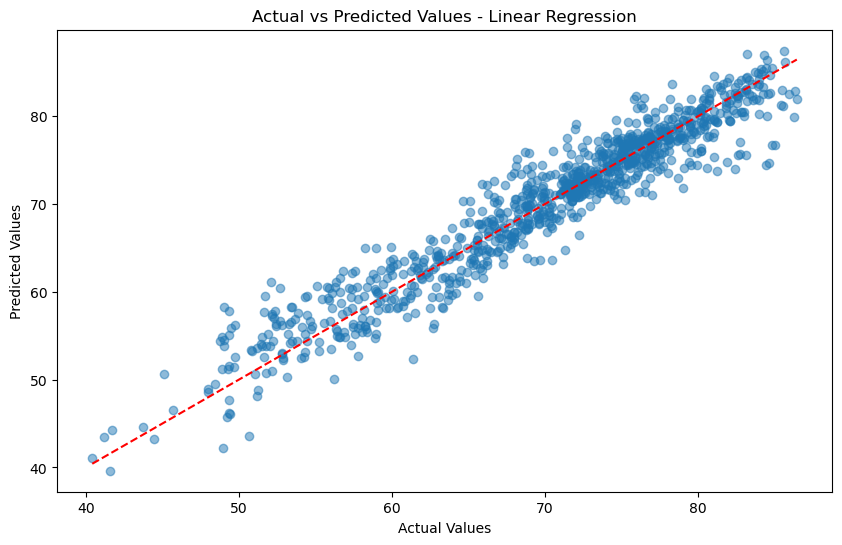

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_ln_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Linear Regression')
plt.show()

**Conclusion:** The linear regression model demonstrated predictive ability with relatively high R-squared values across all data sets, indicating high reliability and accuracy. Consistent RMSE values close to 2.7 further confirm the model's accuracy in predicting longevity. The slightly higher MSE and RMSE values from cross-validation indicate a good fit, but there is room for improvement, possibly by further exploring more complex models.

#### **Model: Ridge Regression**

We calculate ridge regression model MSE, RMSE, R-squanred on testing data. The hyperparameter is decided by using best_estimator_ method.

In [18]:
# Ridge model definition and Grid Search to find the best hyperparameter
ridge_model = Ridge()
ridge_parameters = {'alpha':np.linspace(0.1, 10, num= 100)}

ridge_regressor = model_selection.GridSearchCV(ridge_model, ridge_parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

# Evaluate the best hyperparameter on the validation set
print("Best parameters:", ridge_regressor.best_params_)
best_ridge = ridge_regressor.best_estimator_
y_ridge_pred = best_ridge.predict(X_val)

# Calculate MSE, RMSE, R-squared on validation set
ridge_mse = mean_squared_error(y_val, y_ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_val, y_ridge_pred)

print(f'Validation MSE with Ridge: {ridge_mse:.4f}')
print(f'Root Mean Squared Error (RMSE) with Ridge: {ridge_rmse:.4f}')
print(f'R-squared with Ridge: {ridge_r2:.4f}')

Best parameters: {'alpha': 4.6}
Validation MSE with Ridge: 7.9135
Root Mean Squared Error (RMSE) with Ridge: 2.8131
R-squared with Ridge: 0.9070


Here is scatter plot of Ridge model Actual vs Predicted Values on validation data.

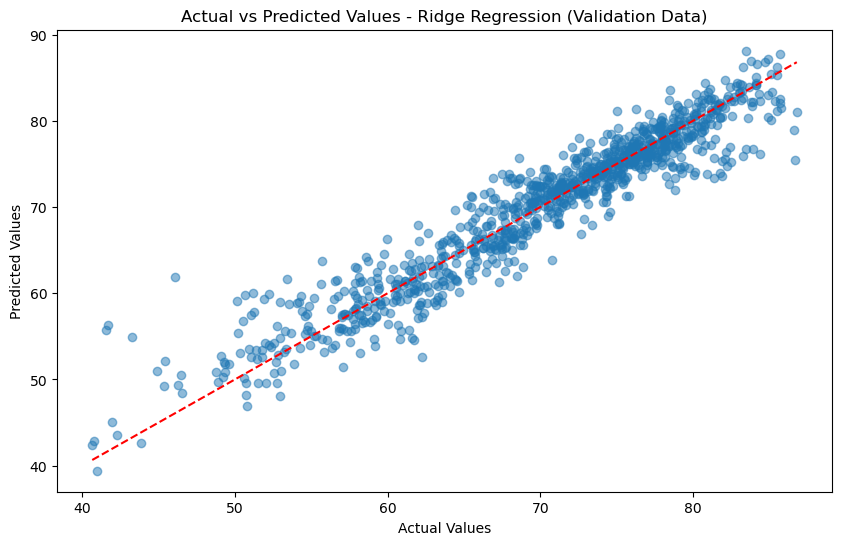

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_ridge_pred, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Ridge Regression (Validation Data)')
plt.show()

#### **Model: Lasso Regression**

We calculate lasso regression model MSE, RMSE, R-squanred on testing data. The hyperparameter is decided by using best_estimator_ method.

In [19]:
# Lasso model definition and Grid Search to find the best hyperparameter
lasso_model = Lasso()
lasso_parameters = {'alpha':np.linspace(0.001, 1, num= 100)}

lasso_regressor = model_selection.GridSearchCV(lasso_model, lasso_parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

# Evaluate the best hyperparameter on the validation set
print("Best parameters:", lasso_regressor.best_params_)
best_lasso = lasso_regressor.best_estimator_
y_lasso_pred = best_lasso.predict(X_val)

# Calculate MSE, RMSE, R-squared on validation set
lasso_mse = mean_squared_error(y_val, y_lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_val, y_lasso_pred)

print(f'Validation MSE with Lasso: {lasso_mse:.4f}')
print(f'Root Mean Squared Error (RMSE) with Lasso: {lasso_rmse:.4f}')
print(f'R-squared with Lasso: {lasso_r2:.4f}')

Best parameters: {'alpha': 0.001}
Validation MSE with Lasso: 7.9142
Root Mean Squared Error (RMSE) with Lasso: 2.8132
R-squared with Lasso: 0.9070


Here is scatter plot of Lasso model Actual vs Predicted Values on validation data.

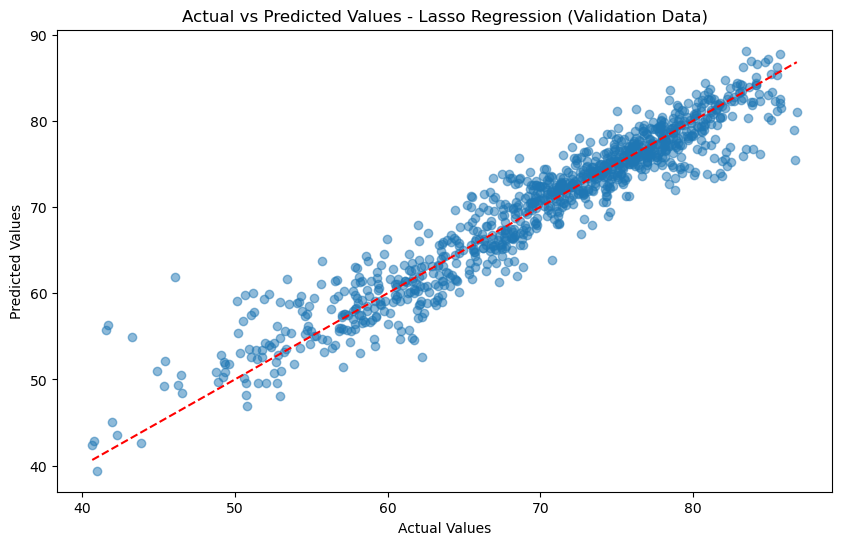

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_lasso_pred, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Lasso Regression (Validation Data)')
plt.show()

The Ridge model gives better results, so we will use this model with the best set of hyperparameters we have found and test it with the test data set.

In [20]:
# Fit the Ridge model in test set
y_test_pred_best_ridge = best_ridge.predict(X_test)

mse_best_ridge = mean_squared_error(y_test, y_test_pred_best_ridge)
rmse_best_ridge = np.sqrt(mse_best_ridge)
r2_best_ridge = r2_score(y_test, y_test_pred_best_ridge)

print(f'Test MSE with Best Model (Ridge): {mse_best_ridge:.4f}')
print(f'Root Mean Squared Error (RMSE) with Best Model (Ridge): {rmse_best_ridge:.4f}')
print(f'R-squared with Best Model (Ridge): {r2_best_ridge:.4f}')

Test MSE with Best Model (Ridge): 7.1683
Root Mean Squared Error (RMSE) with Best Model (Ridge): 2.6774
R-squared with Best Model (Ridge): 0.9160


Here is scatter plot of Ridge model Actual vs Predicted Values on testing data.

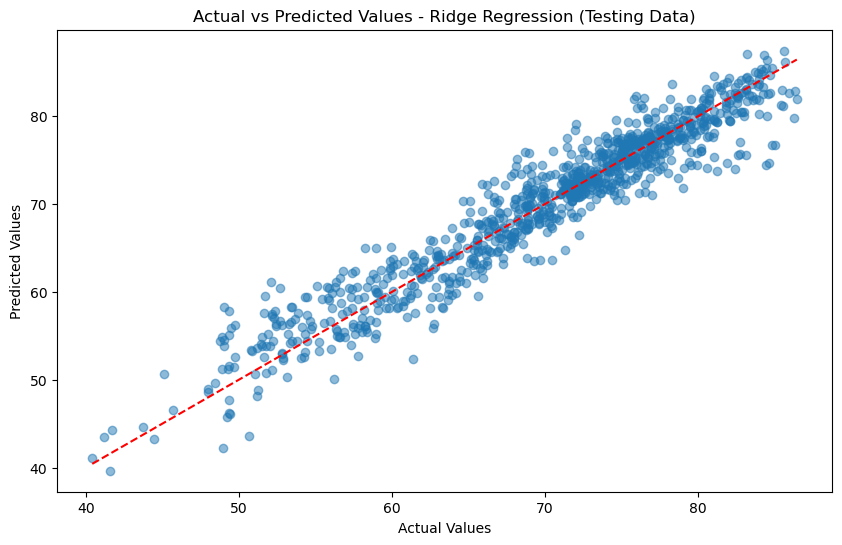

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_best_ridge, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Ridge Regression (Testing Data)')
plt.show()

**Conclusion:** The optimized Ridge model is slightly better than Linear Regression on the test set, with marginally lower MSE and RMSE scores and an equivalent R-squared value. This suggests regularization's effectiveness in addressing overfitting and enhancing model performance.

#### **Model: Elastic Net Regression**

We calculate Elastic Net Regression model MSE, RMSE, R-squanred on testing data. The hyperparameter is decided by first using random grid search cross validation method to find initial best parameter, then use grid search cross validation to setup parameter range around that randomly searched best parameter. After these two steps, we will find the best hyperparameter for our model. 

In [21]:
# Initialize the ElasticNet model
elastic_net_model = ElasticNet(random_state=999)

# Setup initial hyperparameter random range
random_grid_en = {
    'alpha': uniform(0.01, 1.0),
    'l1_ratio': uniform(0, 1) 
}

# Use randomized search cv method to randomly find best hyperparameter
en_random = RandomizedSearchCV(estimator=elastic_net_model, param_distributions=random_grid_en, n_iter=10, cv=3, verbose=2, random_state=999, n_jobs=-1)
en_random.fit(X_train, y_train)

# Print the best hyperparameters result
print("Best Random Search parameters:", en_random.best_params_)

best_random_params_en = en_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Random Search parameters: {'alpha': 0.10092526277407997, 'l1_ratio': 0.3322256807930123}


In [22]:
# Setup initial hyperparameter for grid search cv, that the hyperparameter has range around the random search's value
grid_search_params_en = {
    'alpha': [max(0.01, best_random_params_en['alpha'] * 0.5), best_random_params_en['alpha'] * 1.5],
    'l1_ratio': [max(0, best_random_params_en['l1_ratio'] - 0.1),  min(1, best_random_params_en['l1_ratio'] + 0.1)]
}

# Use GridSearchCV method
en_grid_search = GridSearchCV(estimator=elastic_net_model, param_grid=grid_search_params_en, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
en_grid_search.fit(X_train, y_train)

# Print the best hyperparameters that grid search generated
print("Best Grid Search parameters:", en_grid_search.best_params_)

# Do prediction on testing set
best_en = en_grid_search.best_estimator_
y_pred_en_test = best_en.predict(X_test)

# Calculate testing mse, rmse, r squared
mse_en_test = mean_squared_error(y_test, y_pred_en_test)
rmse_en_test = math.sqrt(mse_en_test)
r2_en_test = r2_score(y_test, y_pred_en_test)

print(f'Elastic Net on testing data MSE: {mse_en_test:.4f}')
print(f'Elastic Net on testing data RMSE: {rmse_en_test:.4f}')
print(f'Elastic Net on testing data R-squared: {r2_en_test:.4f}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Grid Search parameters: {'alpha': 0.050462631387039984, 'l1_ratio': 0.43222568079301227}
Elastic Net on testing data MSE: 7.2454
Elastic Net on testing data RMSE: 2.6917
Elastic Net on testing data R-squared: 0.9151


Here is scatter plot of Elastic Net model Actual vs Predicted Values on testing data.

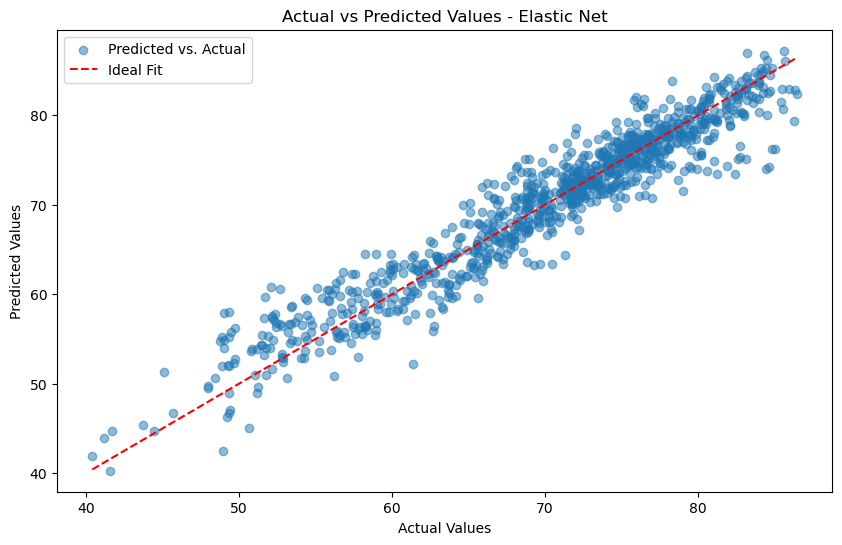

In [23]:
# Make scatter plot of predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_en_test, alpha=0.5, label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Elastic Net')
plt.legend()
plt.show()

### **Tree-Based Models**

In this section, we want initial Hyperparameter Exploration using RandomizedSearchCV, which involves rapidly sampling a series of hyperparameter combinations to identify promising settings for high model performance.

The process then continues using GridSearchCV to comprehensively evaluate a narrower range of parameters near the best settings previously found. This systematic approach fine-tunes hyperparameters to achieve the most efficient model configuration, typically optimizing for Mean Squared Error (MSE).

Finally, we will evaluate the performance using the best hyperparameters derived from GridSearchCV.

#### **Model: Decision Tree**

We will set up a Decision Tree Regressor model to predict life expectancy. This process includes hyperparameter tuning using RandomizedSearchCV followed by GridSearchCV to refine our model’s parameters. This two-step approach helps ensure that we capture the best possible model settings to improve prediction accuracy.


In [24]:
# Make the DecisionTreeRegressor model with a random state for reproducibility
DecisionTree_model1 = DecisionTreeRegressor(random_state=999)

# Define the range of parameters to be randomly sampled
random_grid_decision_tree = {
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 30),
    'min_samples_leaf': randint(1, 30),
    'max_features': ['sqrt', 'log2']
}

# Conduct a Randomized Search to find the best initial hyperparameters
DecisionTree_random = RandomizedSearchCV(estimator=DecisionTree_model1, param_distributions=random_grid_decision_tree, n_iter=10, cv=3, verbose=2, random_state=999, n_jobs=-1)
DecisionTree_random.fit(X_train, y_train)

# Output the best parameters from the random search
print("Best Random Search parameters:", DecisionTree_random.best_params_)

best_random_params_decision_tree = DecisionTree_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Random Search parameters: {'max_depth': 23, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 8}


Following the random search, using GridSearchCV to perform a more exhaustive search within a narrower parameter range around the best results from the RandomizedSearchCV. This ensures that we are optimizing our model to its fullest potential by carefully tuning it.

In [25]:
# Set up parameter grid focusing around the best random search parameters
grid_search_params_decision_tree = {
    'max_depth': [best_random_params_decision_tree['max_depth'] - 5, best_random_params_decision_tree['max_depth'] + 5],
    'min_samples_split': [best_random_params_decision_tree['min_samples_split'] - 2, best_random_params_decision_tree['min_samples_split'] + 2],
    'min_samples_leaf': [best_random_params_decision_tree['min_samples_leaf'] - 2, best_random_params_decision_tree['min_samples_leaf'] + 2],
    'max_features': [best_random_params_decision_tree['max_features']]
}

# Execute the Grid Search
DecisionTree_grid_search = GridSearchCV(estimator=DecisionTree_model1, param_grid=grid_search_params_decision_tree, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
DecisionTree_grid_search.fit(X_train, y_train)

# Output the best parameters from Grid Search
print("Best Grid Search parameters:", DecisionTree_grid_search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Best Grid Search parameters: {'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 6}


With our optimized Decision Tree model, we now predict life expectancy on the validation and testing dataset to evaluate the model's performance. We will also visualize the relationship between actual and predicted values to assess the accuracy of our predictions visually.

In [49]:
# Prediction using the best model from Grid Search
best_DecisionTree = DecisionTree_grid_search.best_estimator_

# Calculate MSE, RMSE, and R-squared for the validation data
y_pred_DecisionTree_val = best_DecisionTree.predict(X_val)
mse_DecisionTree_val = mean_squared_error(y_val, y_pred_DecisionTree_val)
rmse_DecisionTree_val = math.sqrt(mse_DecisionTree_val)
r2_DecisionTree_val = r2_score(y_val, y_pred_DecisionTree_val)

# Display validation data performance metrics
print(f'Decision Tree on testing data MSE: {mse_DecisionTree_val:.4f}')
print(f'Decision Tree on testing data RMSE: {rmse_DecisionTree_val:.4f}')
print(f'Decision Tree on testing data R-squared: {r2_DecisionTree_val:.4f}')
print()


Decision Tree on testing data MSE: 3.4223
Decision Tree on testing data RMSE: 1.8499
Decision Tree on testing data R-squared: 0.9598



Here we calculate MSE, RMSE, Rsquared on the testing data

In [50]:
# Calculate MSE, RMSE, and R-squared for the test data
y_pred_DecisionTree_test = best_DecisionTree.predict(X_test)
mse_DecisionTree_test = mean_squared_error(y_test, y_pred_DecisionTree_test)
rmse_DecisionTree_test = math.sqrt(mse_DecisionTree_test)
r2_DecisionTree_test = r2_score(y_test, y_pred_DecisionTree_test)

# Display test data performance metrics
print(f'Decision Tree on testing data MSE: {mse_DecisionTree_test:.4f}')
print(f'Decision Tree on testing data RMSE: {rmse_DecisionTree_test:.4f}')
print(f'Decision Tree on testing data R-squared: {r2_DecisionTree_test:.4f}')
print()

Decision Tree on testing data MSE: 3.5288
Decision Tree on testing data RMSE: 1.8785
Decision Tree on testing data R-squared: 0.9586



Here is scatter plot of Decision Tree model Actual vs Predicted Values on testing data.

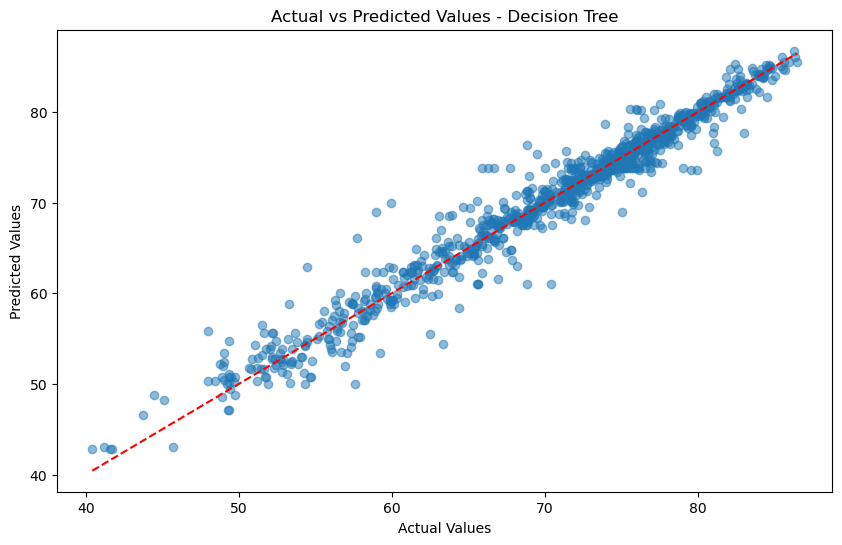

In [51]:
# Create a scatter plot to compare actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_DecisionTree_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Decision Tree')
plt.show()

#### **Model: Random Forest** ####

We are keeping our exploration into tree-based methods with the Random Forest Regressor. This ensemble method is known for its robustness and accuracy in regression tasks. The process includes determining optimal hyperparameters through RandomizedSearchCV, followed by a more focused tuning with GridSearchCV.


In [27]:
# Make the RandomForesstRegressor model with a random state for reproducibility
rf_model = RandomForestRegressor(random_state=999)

# Define the range of parameters to be randomly sampled
random_grid_rf = {
    'n_estimators': randint(250, 300),
    'max_depth': randint(20, 25),
    'min_samples_split': randint(2, 5),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt']
}

# Conduct a Randomized Search to find the best initial hyperparameters
rf_random = RandomizedSearchCV(estimator= rf_model, param_distributions= random_grid_rf, n_iter=10, cv=3, verbose=2, random_state=999, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Output the best parameters from the random search
print("Best Random Search parameters:", rf_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Random Search parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 255}


Following the random search, using GridSearchCV to perform a more exhaustive search within a narrower parameter range around the best results from the RandomizedSearchCV. This ensures that we are optimizing our model to its fullest potential by carefully tuning it.

In [28]:
# Setting up Grid Search based on outcomes from Randomized Search
best_random_params = rf_random.best_params_
grid_search_params = {
    'n_estimators': [best_random_params['n_estimators'] - 5, best_random_params['n_estimators'] + 15],
    'max_depth': [best_random_params['max_depth'] - 1, best_random_params['max_depth'] + 1],
    'min_samples_split': [2, best_random_params['min_samples_split'] + 1],
    'min_samples_leaf': [1,  best_random_params['min_samples_leaf'] + 1],
    'max_features': [best_random_params['max_features']]
}

# Conducting Grid Search CV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=grid_search_params, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

# Print the best hyperparameters that grid search generated
print("Best Grid Search parameters:", rf_grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Grid Search parameters: {'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 270}


With our optimized Random Forest model, we now predict life expectancy on the validation and testing dataset to evaluate the model's performance. We will also visualize the relationship between actual and predicted values to assess the accuracy of our predictions visually.

Here is calculation of MSE, RMSE, R-squared on validation data.

In [29]:
# Do prediciton on validation set
best_rf = rf_grid_search.best_estimator_

# Calculate MSE, RMSE, and R-squared for the validation data
y_rf_pred_val = best_rf.predict(X_val)
mse_rf_val = mean_squared_error(y_val, y_rf_pred_val)
rmse_rf_val = np.sqrt(mse_rf_val)
rsquared_rf_val = r2_score(y_val, y_rf_pred_val)

print(f'Random Forest on validation data MSE: {mse_rf_val:.4f}')
print(f'Random Forest on validation data RMSE: {rmse_rf_val:.4f}')
print(f'Random Forest on validation data r squared: {rsquared_rf_val:.4f}')
print()

Random Forest on validation data MSE: 0.5360
Random Forest on validation data RMSE: 0.7321
Random Forest on validation data r squared: 0.9937



Here is calculation of MSE, RMSE, R-squared on testing data.

In [30]:
# Calculate MSE, RMSE, and R-squared for the test data
y_rf_pred_test = best_rf.predict(X_test)
mse_rf_test = mean_squared_error(y_test, y_rf_pred_test)
rmse_rf_test = np.sqrt(mse_rf_test)
rsquared_rf_test = r2_score(y_test, y_rf_pred_test)

print(f'Random Forest on testing data MSE: {mse_rf_test:.4f}')
print(f'Random Forest on testing data RMSE: {rmse_rf_test:.4f}')
print(f'Random Forest on testing data r squared: {rsquared_rf_test:.4f}')
print()

Random Forest on testing data MSE: 0.5773
Random Forest on testing data RMSE: 0.7598
Random Forest on testing data r squared: 0.9932



Here is scatter plot of Random Forest predicted vs. actual values on testing data.

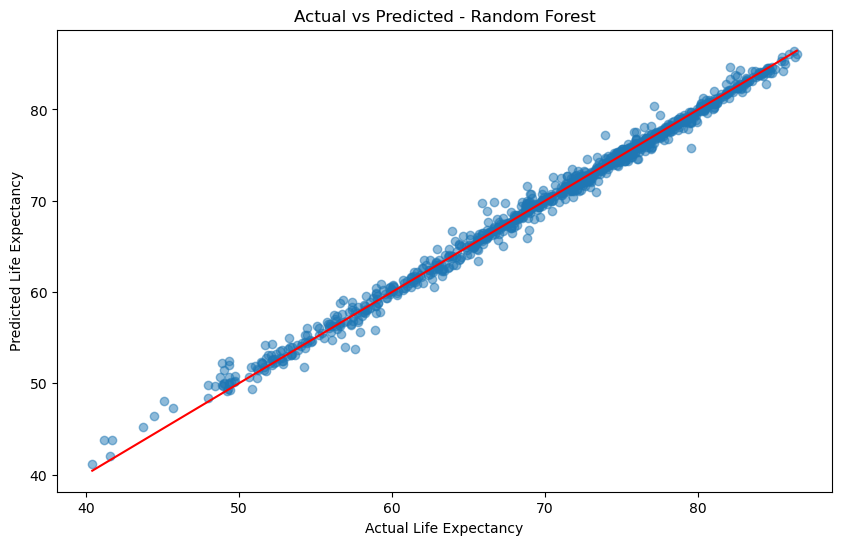

In [54]:
# Visualization of predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted - Random Forest')
plt.show()

#### **Model: Gradient Boosting Regression**

We are going to deploy a Gradient Boosting Regressor, renowned for its precision and efficiency in handling regression tasks. This model will be tuned using a two-tiered approach: starting with RandomizedSearchCV for a broad hyperparameter exploration, followed by GridSearchCV for meticulous hyperparameter fine-tuning. Our goal is to achieve the best possible configuration that maximizes model performance on unseen data.

In [32]:
# Initialize the Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(random_state=999)

# Define the parameter range for Randomized search
random_grid_gb = {
    'n_estimators': randint(100, 200),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 15),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1]
}

# Conduct Randomized Search to identify promising initial parameters
gb_random = RandomizedSearchCV(estimator=gradient_boosting_model, param_distributions=random_grid_gb, n_iter=10, cv=3, verbose=2, random_state=999, n_jobs=-1)
gb_random.fit(X_train, y_train)

# Print the best hyperparameters result
print("Best Random Search parameters:", gb_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Random Search parameters: {'learning_rate': 0.2, 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 150}


Following the random search, using GridSearchCV to perform a more exhaustive search within a narrower parameter range around the best results from the RandomizedSearchCV. This ensures that we are optimizing our model to its fullest potential by carefully tuning it.

In [33]:
#processing time: about 1m54s

# Setting up Grid Search based on outcomes from Randomized Search
best_random_params_gb = gb_random.best_params_
grid_search_params_gb = {
    'n_estimators': [best_random_params_gb['n_estimators'] - 20, best_random_params_gb['n_estimators'] + 20],
    'max_depth': [best_random_params_gb['max_depth'] - 2,  best_random_params_gb['max_depth'] + 2],
    'min_samples_split': [best_random_params_gb['min_samples_split'] - 2, best_random_params_gb['min_samples_split'] + 2],
    'min_samples_leaf': [best_random_params_gb['min_samples_leaf'] - 2,  best_random_params_gb['min_samples_leaf'] + 2],
    'learning_rate': [best_random_params_gb['learning_rate'] - 0.1,  best_random_params_gb['learning_rate'] + 0.1]
}

# Fine-tune the model parameters using Grid Search
gb_grid_search = GridSearchCV(estimator=gradient_boosting_model, param_grid=grid_search_params_gb, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)

# Print the best hyperparameters that grid search generated
print("Best Grid Search parameters:", gb_grid_search.best_params_)

# Do prediction on testing set
best_gb = gb_grid_search.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Grid Search parameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 170}


Following extensive hyperparameter optimization, the Gradient Boosting model is now evaluated on the validation and test dataset. Performance metrics (MSE, RMSE, and R-squared) will quantify the model's effectiveness, and a scatter plot will visually compare the predicted values against the actual values to assess predictive accuracy.

Here is calculation of MSE, RMSE, R-squared on validation data.

In [34]:

# Calculate MSE, RMSE, and R-squared for the validation data
y_pred_gb_val = best_gb.predict(X_val)
mse_gb_val = mean_squared_error(y_val, y_pred_gb_val)
rmse_gb_val = math.sqrt(mse_gb_val)
r2_gb_val = r2_score(y_val, y_pred_gb_val)

print(f'Gradient Boosting on validation data MSE: {mse_gb_val:.4f}')
print(f'Gradient Boosting on validation data RMSE: {rmse_gb_val:.4f}')
print(f'Gradient Boosting on validation data R-squared: {r2_gb_val:.4f}')
print()

Gradient Boosting on validation data MSE: 0.4603
Gradient Boosting on validation data RMSE: 0.6785
Gradient Boosting on validation data R-squared: 0.9946



Here is calculation of MSE, RMSE, R-squared on testing data.

In [35]:
# Calculate MSE, RMSE, and R-squared for the test data
y_pred_gb_test = best_gb.predict(X_test)
mse_gb_test = mean_squared_error(y_test, y_pred_gb_test)
rmse_gb_test = math.sqrt(mse_gb_test)
r2_gb_test = r2_score(y_test, y_pred_gb_test)

print(f'Gradient Boosting on testing data MSE: {mse_gb_test:.4f}')
print(f'Gradient Boosting on testing data RMSE: {rmse_gb_test:.4f}')
print(f'Gradient Boosting on testing data R-squared: {r2_gb_test:.4f}')
print()

Gradient Boosting on testing data MSE: 0.4188
Gradient Boosting on testing data RMSE: 0.6471
Gradient Boosting on testing data R-squared: 0.9951



Here is scatter plot of Gradient Boosting predicted vs. actual values on testing data

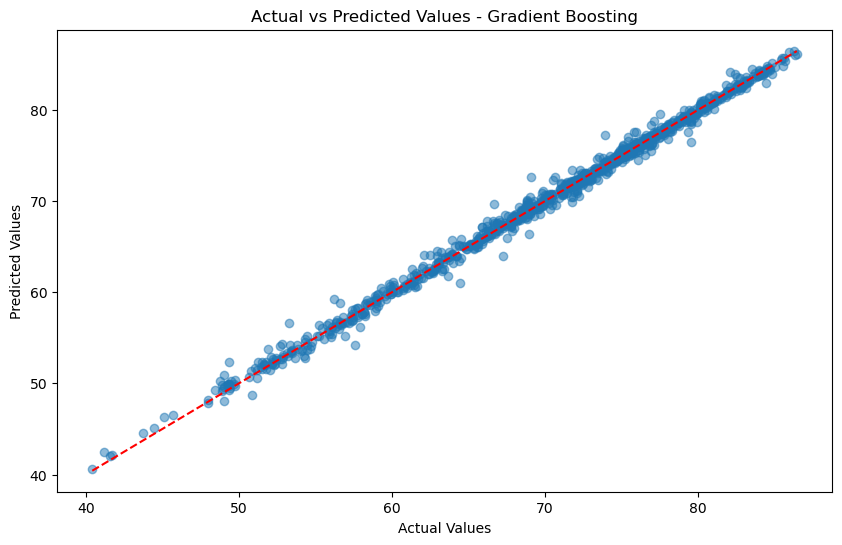

In [36]:
# Make scatter plot of predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Gradient Boosting')
plt.show()

**Conclusion:** 
The results demonstrate the different strengths of each model. While all three models perform well, the Gradient Boosting model stands out in accuracy and efficiency. It provides the most accurate predictions with the highest reliability among the three predictions. Random Forests also demonstrate excellent prediction capabilities, with slightly less accuracy than Gradient Boosting but with significantly faster computation speeds. 

In contrast, Decision Trees with a simple mechanism still provide certain reliability compared to Linear Regression models, but the variability is more considerable, and errors are higher than those of the two tree-based models mentioned above.

### **Multilayer Perceptron (MLP)**

In this section, we will apply Multi-Layer Perceptron (MLP), a type of neural network, to predict life expectancy. MLPs are well-suited for complex regression tasks due to their ability to model intricate patterns in data through multiple layers and neurons. By training an MLP model on our dataset, we aim to harness its predictive power to estimate life expectancy based on various input features. This approach will involve tuning several hyperparameters to optimize the model's performance and conducting a thorough evaluation of its predictive accuracy on test data

We are now implementing an MLP model to predict life expectancy. This neural network will consist of multiple dense layers with regularization to prevent overfitting. We'll visualize the training process with plots of loss and mean squared error (MSE) over epochs to monitor the model's learning progress and adjust if necessary. The goal is to finely tune the MLP to achieve high accuracy on our validation set.

In [37]:
# Define a function to plot the history of model training
def plot_history(history):
    # Plot training and validation loss
    df_history = pd.DataFrame(history.history)
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))

    df_history[['loss', 'val_loss']].plot(ax=ax[0])
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Training and Validation Loss')
    ax[0].grid(True)

    # Plot training and validation MSE
    df_history[['mean_squared_error', 'val_mean_squared_error']].plot(ax=ax[1])
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('MSE')
    ax[1].set_title('Training and Validation MSE')
    ax[1].grid(True)

    plt.show()

**Overview of MLP Model Architecture**

Our Multi-Layer Perceptron (MLP) model, designed to predict life expectancy, features a compact yet powerful architecture:

- **Configuration**:
  - **Input Layer**: Adjusted to match the number of features.
  - **Two Hidden Layers**: Each with 64 neurons using ReLU activation, equipped with L1 and L2 regularization (L1=0.002, L2=0.005) to curb overfitting.
  - **Output Layer**: Single neuron, linear activation for regression output.

- **Operational Settings**:
  - **Optimizer**: RMSprop, adapting learning rate for optimal gradient descent.
  - **Loss Metric**: Mean Squared Error (MSE), complemented by Mean Absolute Error (MAE) to track prediction accuracy.
  - **Training Regime**: 100 epochs, batch size of 512, across training and validation sets for balanced learning.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,313 (20.75 KB)

 Trainable params: 5,313 (20.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4845.5005 - mean_absolute_error: 68.9512 - mean_squared_error: 4843.8618 - val_loss: 4580.6538 - val_mean_absolute_error: 66.9858 - val_mean_squared_error: 4578.9907
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4422.9351 - mean_absolute_error: 65.7535 - mean_squared_error: 4421.2588 - val_loss: 4062.9084 - val_mean_absolute_error: 62.9290 - val_mean_squared_error: 4061.1873
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3866.9375 - mean_absolute_error: 61.3011 - mean_squared_error: 3865.1990 - val_loss: 3394.9243 - val_mean_absolute_error: 57.2186 - val_mean_squared_error: 3393.1284
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3170.0923 - mean_absolute_error: 55.0907 - mean_squared_error: 3168.2764 - val_loss: 2626.2227 - val_mean_absolute_error: 49.7171 - val_mean_squared_error: 2624.3420
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2419.1196 - mean_absolute_error: 47.4385 

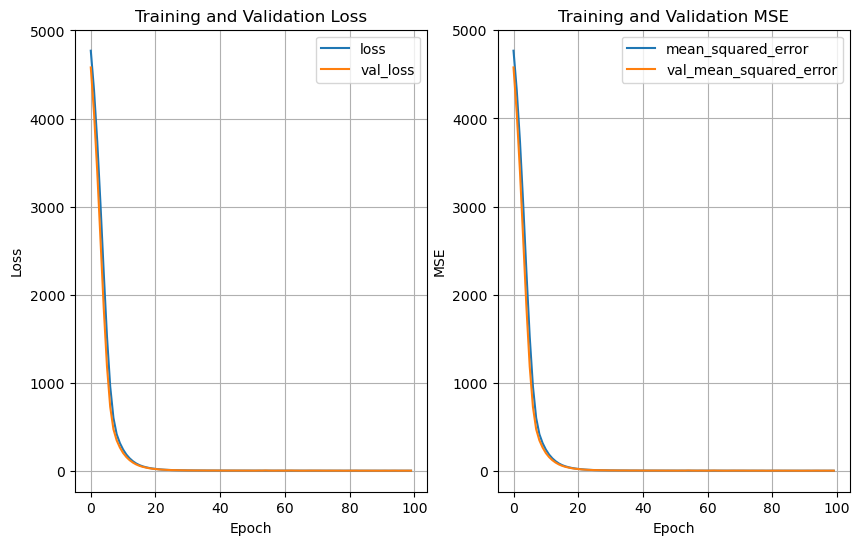

In [38]:
# Configure the MLP model
mlp_model = keras.Sequential([
    keras.layers.Input((X_train.shape[1], )),
    keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l1_l2(l1=0.002, l2=0.005), activation="relu"),
    # the dropot will make the result acutally worse, thus comment out won't use it
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l1_l2(l1=0.002, l2=0.005), activation="relu"),
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='linear'),
])

# Display model architecture
mlp_model.summary()

# Compile the model with MSE as the loss metric and include MAE for further insight
mlp_model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss='mean_squared_error',
    metrics=['mean_squared_error', 'mean_absolute_error'],
)

# Train the model and validate it using the provided validation data
mlp_model_history = mlp_model.fit(X_train, y_train, epochs = 100, batch_size = 512, validation_data = (X_val, y_val))

plot_history(mlp_model_history)

Now that our MLP model has been trained and validated, the next step is to evaluate its performance on the test dataset.

In [39]:
# Making predictions with the MLP model on the test dataset
y_pred_mlp = mlp_model.predict(X_test)

# Calculate MSE, RMSE, and R-squared for the test data
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = math.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"MLP Testing MSE: {mse_mlp:.4f}")
print(f"MLP Testing RMSE: {rmse_mlp:.4f}")
print(f"MLP R-squared (R²): {r2_mlp:.4f}")

 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MLP Testing MSE: 3.7001
MLP Testing RMSE: 1.9236
MLP R-squared (R²): 0.9566


Here is scatter plot of MLP predicted vs. actual values on testing data

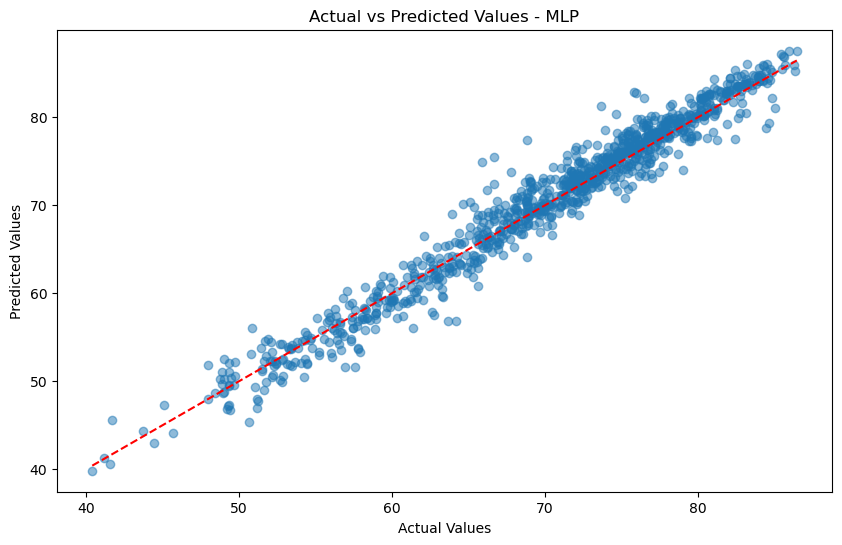

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - MLP')
plt.show()

**Conclusion:** The Multi-Layer Perceptron (MLP) model performed well on the test data, as shown by its metrics. It had a Mean Squared Error (MSE) of 3.5758 and a Root Mean Squared Error (RMSE) of 1.8910, which are relatively low, indicating accurate predictions. Additionally, its R-squared value was 0.9581, meaning it could explain about 95.81% of the variance in life expectancy. These results suggest that the MLP is a dependable model for similar predictive tasks

#### **Evaluating Model Performance to Identify the Best Predictor Model**

In this section, we will compare the performance metrics of all the models we have developed and tested, including Linear Regrssor, Ridge, Lasso, Elastic Net, Decision Tree, Random Forest, Gradient Boosting, and MLP models. Our goal is to identify which model demonstrates the highest accuracy and reliability in predicting life expectancy based on our dataset.


In [40]:
# Dictionary to hold the MSE of each model for comparison
mse_dict = {
    'Simple Linear Regression': ln_mse_test,
    'Ridge Regression': mse_best_ridge,
    'Random Forest': mse_rf_test,
    'Decision Tree': mse_DecisionTree_test,
    'Multilayer Perceptron': mse_mlp,
    'Gradient Boosting Regression': mse_gb_test,
    'Elastic Net Regression': mse_en_test,
}

# Determine the model with the minimum MSE
min_mse_model = min(mse_dict, key=mse_dict.get)
min_mse_value = mse_dict[min_mse_model]

# Output the model with the lowest MSE and its corresponding MSE value
print(f"The model with the lowest MSE is: {min_mse_model} with an MSE of: {min_mse_value:.4f}")


The model with the lowest MSE is: Gradient Boosting Regression with an MSE of: 0.4188


**Outcome of Model Comparison**

After thorough testing and evaluation across several predictive models, the Gradient Boosting Regression model is the superior choice due to its outstanding performance on the test dataset. It achieved the lowest Mean Squared Error (MSE) of 0.4188 among all the evaluated models.

## **Part 6：Conclusion** ##

**Overview of Model Evaluations**
Throughout this project, we explored a range of predictive models to estimate life expectancy, assessing each model's performance based on accuracy, reliability, and computational efficiency. Here are the key findings from our analysis:

**Linear, Ridge, Lasso, and Elastic Net Regression:** These models showcased robust predictive abilities with high R-squared values, affirming their reliability and accuracy. Implementing regularization, The Ridge Regression model slightly outperformed the simple Linear Regression or Elastic Net by achieving lower MSE and RMSE values, indicating its enhanced ability to manage overfitting.

**Decision Trees and Random Forest:** While Decision Trees offered a basic yet effective solution, they showed more significant variability and higher error rates than more sophisticated models. On the other hand, the Random Forest model greatly improved Decision Trees by reducing error and delivering excellent prediction. Random Forest stands out for its computational efficiency, making it a suitable option when faster computation is required.

**Gradient Boosting Regression:** This model emerged as the top performer with the lowest MSE and the highest R-squared value, proving its superior accuracy and prediction consistency. Its ability to effectively capture and model complex patterns in data makes it the best model for tasks demanding high precision.

**Multilayer Perceptron (MLP):** The MLP model also demonstrated commendable performance with good MSE and RMSE scores and an impressive ability to explain approximately 95.81% of the variance in the dataset. Its results suggest that it is a reliable and accurate model for predictive tasks, though it falls slightly short of the Gradient Boosting model in terms of overall error metrics.

**Final Recommendations and Considerations**
Choosing the suitable model for predicting life expectancy depends on several factors beyond mere accuracy, including computational demands, model complexity, and the specific requirements of the application scenario.

**For Highest Accuracy:** Gradient Boosting Regression is recommended for scenarios where precision is critical despite its potentially higher computational cost.

**For Faster Predictions:** Random Forest and MLP models offers a great compromise between speed and accuracy and can be particularly useful in real-time applications or when computational resources are limited.